In [10]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [11]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [12]:
base = pd.read_csv(path_base('db_plano_saude2.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_plano_saude2.csv


In [9]:
base.head(3)

,idade,custo
0,18,470
1,23,520
2,28,630


In [4]:
base.shape

(10, 2)

In [5]:
X = base.iloc[:,0:1].values
print(X)

[[18]
 [23]
 [28]
 [33]
 [38]
 [43]
 [48]
 [53]
 [58]
 [63]]


In [13]:
y = base.iloc[:,1:2].values
print(y)

[[  470]
 [  520]
 [  630]
 [  830]
 [ 1150]
 [ 1530]
 [ 2040]
 [ 3080]
 [ 5100]
 [10100]]


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [16]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [17]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()

In [18]:
regressor.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Score

In [19]:
score = regressor.score(X,y)
score

0.8843970219178703

# plotar

In [23]:
import matplotlib.pyplot as plt

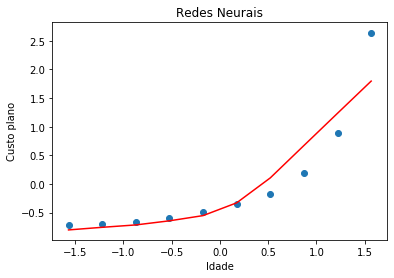

In [25]:
plt.scatter(X,y)
plt.title('Redes Neurais')
plt.xlabel('Idade')
plt.ylabel('Custo plano')
plt.plot(X,regressor.predict(X),color='red')

In [29]:
print(scaler_y.inverse_transform(regressor.predict(X)))

[ 247.55311319  378.11485371  497.26494608  702.74098707  963.65460287
 1602.87772593 2851.57866443 4471.06453626 6086.01710924 7694.58675711]
